In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
!ls ./fivethirtyeight-comic-characters-dataset/

README.md             dc-wikia-data.csv     marvel-wikia-data.csv


In [76]:
marvel_data = pd.read_csv("./fivethirtyeight-comic-characters-dataset/marvel-wikia-data.csv")
dc_data = pd.read_csv("./fivethirtyeight-comic-characters-dataset/dc-wikia-data.csv")

In [77]:
marvel_data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [78]:
dc_data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [79]:
dc_data.columns

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'YEAR'],
      dtype='object')

In [80]:
marvel_data.columns

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year'],
      dtype='object')

In [81]:
data = pd.concat([dc_data.rename(columns={"YEAR": "Year"}).assign(is_dc=1), marvel_data.assign(is_dc=0)])

In [82]:
data.columns, len(data.columns)

(Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
        'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year', 'is_dc'],
       dtype='object'), 14)

In [83]:
data.drop(columns=["page_id", "urlslug", "GSM"], inplace=True)

In [84]:
data["ID"] = data.ID.str.replace("Identity", "").str.strip()

In [85]:
data["ALIGN"] = data.ALIGN.str.replace("Characters", "").str.strip()

In [86]:
data["HAIR"] = data.HAIR.str.replace("Hair", "").str.strip()
data["SEX"] = data.SEX.str.replace("Characters", "").str.strip()
data["ALIVE"] = data.ALIVE.str.replace("Characters", "").str.strip()

In [91]:
data[(data["FIRST APPEARANCE"].str.find("Hol") != -1) & (~data["FIRST APPEARANCE"].isna())] 

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,is_dc
4179,Fidel Castro (New Earth),NaN,NaN,NaN,NaN,Male,Living,4.0,"1988, Holiday",1988.0,1
5346,Sally Milton (New Earth),Public,NaN,Auburn Hair,NaN,Female,Living,2.0,"1988, Holiday",1988.0,1


In [15]:
data["FIRST APPEARANCE"] = data["FIRST APPEARANCE"].str.replace("(\d{4},)|(-\d{2})", "").str.strip()

In [16]:
tmp = data["FIRST APPEARANCE"].apply(lambda x: str(x).strip()[:3] if not str(x).isdigit() else str(x))
data["FIRST APPEARANCE"] = tmp

In [17]:
import seaborn as sns
data.sample(5)

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,is_dc
2491,Tiamat (New Earth),NaN,Bad,Blue Eyes,Blond,Female,Living,9.0,Dec,1995.0,1
6480,Bragi (New Earth),NaN,NaN,NaN,NaN,Male,Living,1.0,Oct,1967.0,1
153,William Magnus (New Earth),Public,Good,Blue Eyes,Brown,Male,Living,170.0,Apr,1962.0,1
13644,Adelicia von Krupp (Earth-616),No Dual,Bad,Blue Eyes,Blond,Female,Living,1.0,Jul,1997.0,0
1693,Tex Morgan (Earth-616),No Dual,Good,NaN,Black,Male,Living,21.0,Aug,1948.0,0


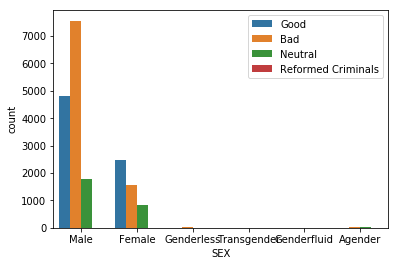

In [18]:
sns.countplot(x="SEX", hue="ALIGN", data=data)
plt.legend(loc="upper right")

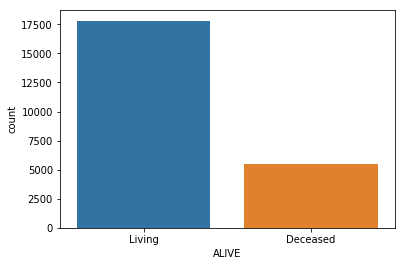

In [32]:
sns.countplot(x="ALIVE", data=data)

<Figure size 432x720 with 0 Axes>

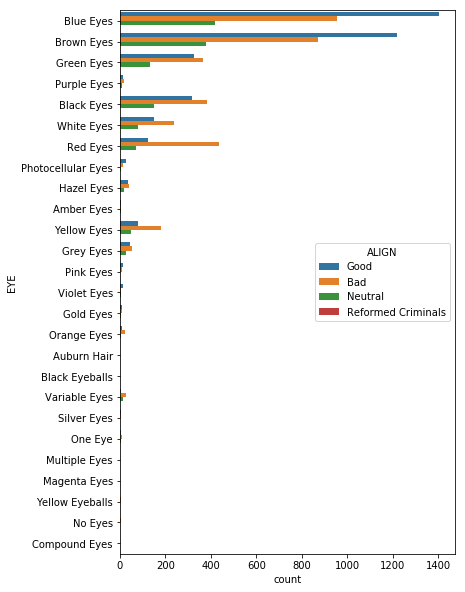

In [38]:
plt.figure(figsize=(6,10))
sns.countplot(y="EYE", hue='ALIGN', data=data)

<Figure size 432x720 with 0 Axes>

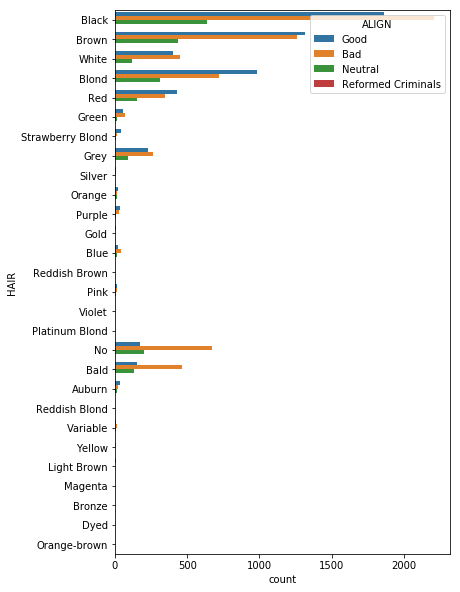

In [40]:
plt.figure(figsize=(6,10))
sns.countplot(y="HAIR", hue='ALIGN', data=data)

(0, 15000)

(-10, 200)

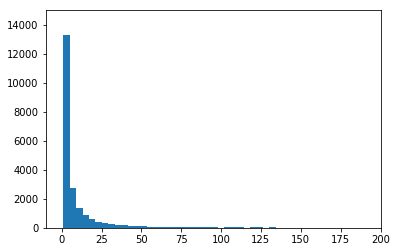

In [61]:
_ = plt.hist(data["APPEARANCES"].dropna(), bins=1000)
plt.ylim((0, 15000))
plt.xlim((-10, 200))

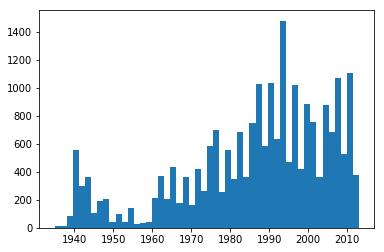

In [67]:
_ = plt.hist(data["Year"].dropna(), bins=50)

<Figure size 576x288 with 0 Axes>

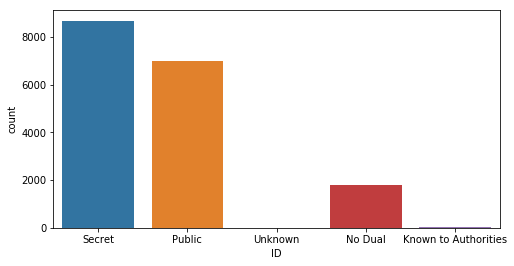

In [72]:
plt.figure(figsize=(8, 4))
sns.countplot(x="ID", data=data)

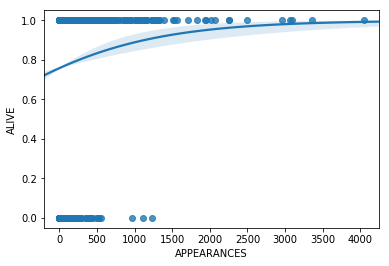

In [28]:
sns.regplot(x="APPEARANCES", y='ALIVE', data=data.replace({"Living": 1, "Deceased": 0}), logistic=True)